ls -lht /root/datascience/recordings/*.iq | head -n 1 | awk '{print $9}'
SDR Settings:
{
    "frequency": 2450000000.0,
    "bandwidth": 60000000.0,
    "sample_rate": 60000000.0,
    "gain": 61,
    "sdr": "sidekiq",
    "timestamp": "20240814_230226"
}
Shape of waterfall data: (44, 256)


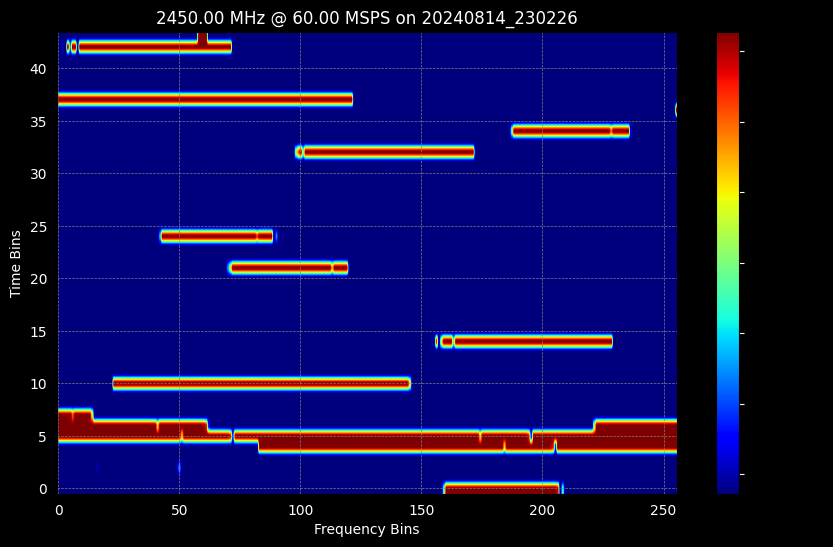

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import os
import json

# Path to your recordings directory
recordings_dir = '/root/datascience/recordings/'

# Filename of the 16T binary data file (update this with your actual filename)
cmd = f"ls -lht {recordings_dir}*.iq | head -n 1 | " + "awk '{print $9}'"
print(cmd)
filename = os.popen(cmd).read()[:-4] # remove .iq and newline
# filename = '2450_60_20240814_230226'

# Load the binary IQ data from the file
file_path = os.path.join(recordings_dir, f'{filename}.iq')
iq_data = np.fromfile(file_path, dtype=np.int16)

# Load the corresponding JSON file with SDR settings
json_file_path = os.path.join(recordings_dir, f'{filename}.json')
with open(json_file_path, 'r') as json_file:
    sdr_settings = json.load(json_file)

# Print the SDR settings to confirm they are loaded correctly
print("SDR Settings:")
print(json.dumps(sdr_settings, indent=4))

# Reshape the data assuming each row is of a fixed length, replace 'row_length' with actual length
# If the length is unknown, you might need to handle that dynamically
row_length = 256  # Set the correct row length (number of frequency bins)

# Ensure that the total number of elements is divisible by the row length
num_rows = iq_data.size // row_length
iq_data = iq_data[:num_rows * row_length]  # Truncate to a clean multiple
waterfall_data = iq_data.reshape((num_rows, row_length))

# Debugging: Print the shape of the reshaped data
print("Shape of waterfall data:", waterfall_data.shape)

# Ensure the data is in the correct numeric format
waterfall_data = np.array(waterfall_data, dtype=np.float64)

# Extract relevant details from SDR settings
frequency_mhz = sdr_settings.get('frequency', 0) / 1e6  # Convert Hz to MHz
sample_rate_msps = sdr_settings.get('sample_rate', 0) / 1e6  # Convert S/s to MSPS
timestamp = sdr_settings.get('timestamp', 'Unknown Timestamp')

# Create the custom title
title = f'{frequency_mhz:.2f} MHz @ {sample_rate_msps:.2f} MSPS on {timestamp}'

# Plotting the heatmap with dark mode settings
plt.figure(figsize=(10, 6))
plt.imshow(waterfall_data, aspect='auto', cmap='jet', origin='lower')

# Customize the plot for dark mode
plt.gca().set_facecolor('black')  # Set the plot face color to black
plt.gcf().set_facecolor('black')  # Set the figure face color to black
plt.colorbar(label='Amplitude (dB)').ax.yaxis.set_tick_params(color='white')  # Set colorbar text color to white

# Set axis labels and title with white color
plt.title(title, color='white')
plt.xlabel('Frequency Bins', color='white')
plt.ylabel('Time Bins', color='white')

# Set axis tick labels to white
plt.xticks(color='white')
plt.yticks(color='white')

# Set grid color to a darker shade (optional)
plt.grid(color='gray', linestyle='--', linewidth=0.5)

# Display the plot
plt.show()
